In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1

Self-varifying first question

In [ ]:
def conv2d(a, f):
    s = f.shape + tuple(np.subtract(a.shape, f.shape) + 1)
    strd = np.lib.stride_tricks.as_strided
    subM = strd(a, shape = s, strides = a.strides * 2)
    return np.einsum('ij,ijkl->kl', f, subM)

In [ ]:
mat_1 = np.array([[-1,0,2],[1,-2,1]])
mat_2 = np.array([[-1,-1,-1],[1,1,1],[0,0,0]])

In [ ]:
padded_mat_1 = np.pad(mat_1, ((1, 1), (1, 1)), mode='constant')
a = conv2d(padded_mat_1, mat_2)
print(a)

[[-1  1  2]
 [ 0 -1 -3]]


### Question 2

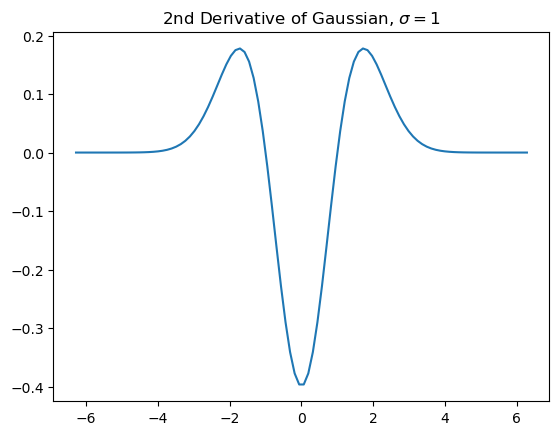

In [10]:
# a
x = np.linspace(-2*np.pi, 2*np.pi, 100)
sigma = 1
ddg = 1/np.sqrt(2*np.pi)*1/sigma**3*np.exp(-x**2/(2*sigma**2))*(x**2/sigma**2-1)
plt.plot(x, ddg)
plt.title('2nd Derivative of Gaussian, $\sigma=1$')
plt.show()

In [34]:
# b
x = np.linspace(-2*np.pi, 2*np.pi, 100)
sigma = 1
k_1 = 1
k_arr = np.arange(1.2,2.1,0.2)
gs = 1/np.sqrt(2*np.pi)/sigma*np.exp(-x**2/(2*sigma**2))
gks = np.array([1/np.sqrt(2*np.pi)/(k*sigma)*np.exp(-x**2/(2*k**2*sigma**2)) for k in k_arr])
diff = (gks - gs)/(np.repeat(np.array([k_arr]).T, len(x), axis = 1)*sigma - sigma)

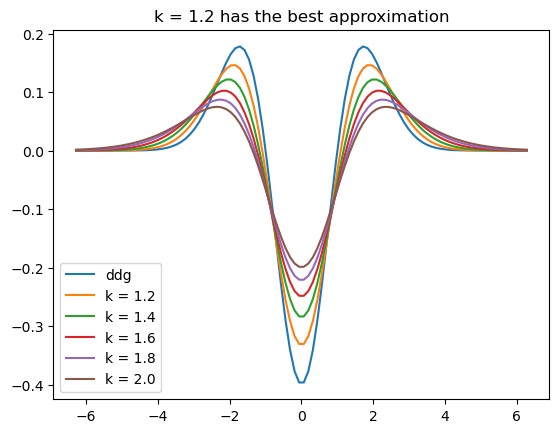

In [37]:
plt.plot(x, ddg, label = 'ddg')
for i in range(len(k_arr)):
    plt.plot(x, diff[i], label = f'k = {np.round(k_arr[i], 1)}')
plt.legend()
plt.title('k = 1.2 has the best approximation')
plt.show()

In [38]:
# c it will respond maximally to edges